The code below showcases a simple matrix multiplication printing both the matrices used and the product. One result with matrix A$\cdot$B and the other B$\cdot$A.

In [1]:
import numpy as np
from numpy import sqrt,exp,e,log

A = np.array([[1,3],[2,4],[5,6]],float)
B = np.array([[2,1,4],[3,2,1]],float)
print('A:\n ',A)
print()
print('B:\n ',B)
print()
print('A*B:\n ',A@B)
print()
print('B*A:\n ',B@A)

A:
  [[1. 3.]
 [2. 4.]
 [5. 6.]]

B:
  [[2. 1. 4.]
 [3. 2. 1.]]

A*B:
  [[11.  7.  7.]
 [16. 10. 12.]
 [28. 17. 26.]]

B*A:
  [[24. 34.]
 [12. 23.]]


The following code is an example of finding the proper fit to a data set using different parameters. The data from a given text file was plotten then fitted.

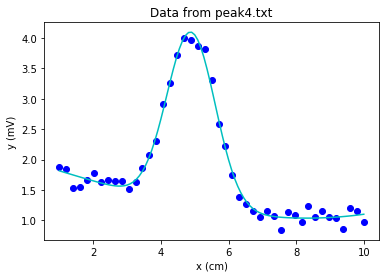

parameters and 2-sigma parameter uncertainties:
A = 2.852121 +/- 0.124866
x0 = 4.892762 +/- 0.031880
w = -0.716399 +/- 0.039860
B0 = 1.986767 +/- 0.122132
B1 = -0.171358 +/- 0.044916
B2 = 0.000829 +/- 0.000435

Reduced chi-squared = 0.011596


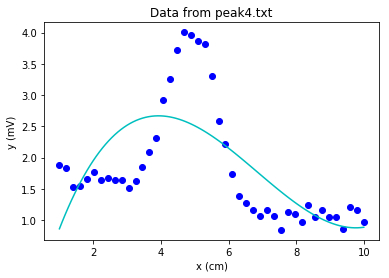

parameters and 2-sigma parameter uncertainties:
A = 6.826272 +/- inf
x0 = -1.499313 +/- inf
w = 0.346482 +/- inf
B0 = -0.859202 +/- inf
B1 = 2.074026 +/- inf
B2 = -0.370170 +/- inf
B3 = 0.018023 +/- inf

Reduced chi-squared = 0.527250


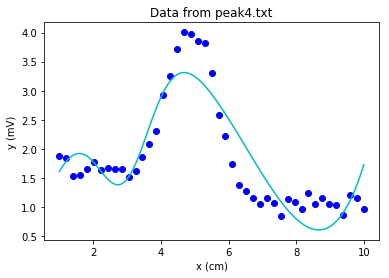

parameters and 2-sigma parameter uncertainties:
A = -2.112915 +/- 0.675926
x0 = 2.902663 +/- 0.252991
w = -0.798877 +/- 0.331714
B0 = 0.302315 +/- 1.190157
B1 = 1.492358 +/- 0.432258
B2 = -0.057726 +/- 0.014981
B3 = 0.004423 +/- 0.001205

Reduced chi-squared = 0.204909


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt,linspace,exp
from pylab import errorbar,plot,show,title,xlabel,ylabel
from scipy import linalg
from scipy.optimize import curve_fit

data = np.loadtxt('peak4.txt', float,skiprows=1) # read into 2D array
x = data[:,0]
y = data[:,1]

def f(x,aa,x0,w,bb0,bb1,bb2):
    """Model function: Gaussian plus linear background"""
    return aa*exp(-(x-x0)**2/(2*w**2)) + bb0 + bb1*x + bb2*x**3

# Use curve_fit to fit the data:
guesses = [1,1,1,1,1,1]   # parameter guesses
(aa,x0,w,bb0,bb1,bb2),cc = curve_fit(f,x,y,p0=guesses)

# Plot data and model together
xmod = np.linspace(x[0],x[-1],100)       # assumes x's are in order
ymod = f(xmod,aa,x0,w,bb0,bb1,bb2)
plot(x,y,'bo') # plot the data
plot(xmod,ymod,'c')                  # plot the model
title('Data from peak4.txt')
xlabel('x (cm)')
ylabel('y (mV)')
show()

# Print parameters and their 2-sigma uncertainties:
(uaa,ux0,uw,ubb0,ubb1,ubb2) = 2*sqrt(np.diag(cc))
print('parameters and 2-sigma parameter uncertainties:')
print('A = %f +/- %f'%(aa,uaa))
print('x0 = %f +/- %f'%(x0,ux0))
print('w = %f +/- %f'%(w,uw))
print('B0 = %f +/- %f'%(bb0,ubb0))
print('B1 = %f +/- %f'%(bb1,ubb1))
print('B2 = %f +/- %f'%(bb2,ubb2))

# Compute reduced chi-squared:
yfit = f(x,aa,x0,w,bb0,bb1,bb2)
yys = (yfit-y)**2
dof = len(x) - len(guesses)    # degrees of freedom
chisqr = sum(yys)/dof
print()
print('Reduced chi-squared = %f'%chisqr)

data = np.loadtxt('peak4.txt', float,skiprows=1) # read into 2D array
x = data[:,0]
y = data[:,1]

def f(x,aa,x0,w,bb0,bb1,bb2,bb3):
    """Model function: Gaussian plus linear background"""
    return aa*exp(-(x-x0)**2/(2*w**2)) + bb0 + bb1*x + bb2*x**2 + bb3*x**3

# Use curve_fit to fit the data:
guesses = [1,1,1,1,1,1,1]   # parameter guesses
(aa,x0,w,bb0,bb1,bb2,bb3),cc = curve_fit(f,x,y,p0=guesses)

# Plot data and model together
xmod = np.linspace(x[0],x[-1],100)       # assumes x's are in order
ymod = f(xmod,aa,x0,w,bb0,bb1,bb2,bb3)
plot(x,y,'bo') # plot the data
plot(xmod,ymod,'c')                  # plot the model
title('Data from peak4.txt')
xlabel('x (cm)')
ylabel('y (mV)')
show()

# Print parameters and their 2-sigma uncertainties:
(uaa,ux0,uw,ubb0,ubb1,ubb2,ubb3) = 2*sqrt(np.diag(cc))
print('parameters and 2-sigma parameter uncertainties:')
print('A = %f +/- %f'%(aa,uaa))
print('x0 = %f +/- %f'%(x0,ux0))
print('w = %f +/- %f'%(w,uw))
print('B0 = %f +/- %f'%(bb0,ubb0))
print('B1 = %f +/- %f'%(bb1,ubb1))
print('B2 = %f +/- %f'%(bb2,ubb2))
print('B3 = %f +/- %f'%(bb3,ubb3))

# Compute reduced chi-squared:
yfit = f(x,aa,x0,w,bb0,bb1,bb2,bb3)
yys = (yfit-y)**2
dof = len(x) - len(guesses)    # degrees of freedom
chisqr = sum(yys)/dof
print()
print('Reduced chi-squared = %f'%chisqr)

data = np.loadtxt('peak4.txt', float,skiprows=1) # read into 2D array
x = data[:,0]
y = data[:,1]

def f(x,aa,x0,w,bb0,bb1,bb2,bb3):
    """Model function: Gaussian plus linear background"""
    return aa*exp(-(x-x0)**2/(2*w**2)) + bb0 + bb1*x + bb2*x**3 + bb3*x**4

# Use curve_fit to fit the data:
guesses = [1,1,1,1,1,1,1]   # parameter guesses
(aa,x0,w,bb0,bb1,bb2,bb3),cc = curve_fit(f,x,y,p0=guesses)

# Plot data and model together
xmod = np.linspace(x[0],x[-1],100)       # assumes x's are in order
ymod = f(xmod,aa,x0,w,bb0,bb1,bb2,bb3)
plot(x,y,'bo') # plot the data
plot(xmod,ymod,'c')                  # plot the model
title('Data from peak4.txt')
xlabel('x (cm)')
ylabel('y (mV)')
show()

# Print parameters and their 2-sigma uncertainties:
(uaa,ux0,uw,ubb0,ubb1,ubb2,ubb3) = 2*sqrt(np.diag(cc))
print('parameters and 2-sigma parameter uncertainties:')
print('A = %f +/- %f'%(aa,uaa))
print('x0 = %f +/- %f'%(x0,ux0))
print('w = %f +/- %f'%(w,uw))
print('B0 = %f +/- %f'%(bb0,ubb0))
print('B1 = %f +/- %f'%(bb1,ubb1))
print('B2 = %f +/- %f'%(bb2,ubb2))
print('B3 = %f +/- %f'%(bb3,ubb3))

# Compute reduced chi-squared:
yfit = f(x,aa,x0,w,bb0,bb1,bb2,bb3)
yys = (yfit-y)**2
dof = len(x) - len(guesses)    # degrees of freedom
chisqr = sum(yys)/dof
print()
print('Reduced chi-squared = %f'%chisqr)



The following code shows the computting and plotting of a function defined by an integral. The function is is solved for using two different integration methods: using scipy.integrate.quad, and Simpson's rule. The function was plotted without any integration as well, as indicated in the key of plot.

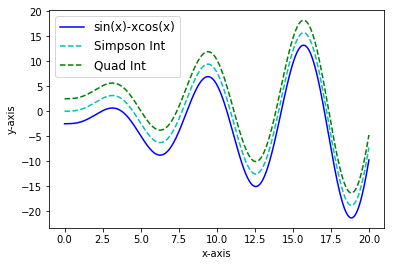

In [3]:
import numpy as np
from numpy import sin,cos
import scipy.integrate as integrate
import matplotlib.pyplot as pylab
from pylab import plot,xlabel,ylabel,title,legend

pts = 1000
x = np.linspace(0,20,pts)
z = sin(x) - x*cos(x)

def f(x):
    """Integral of Function"""
    return x*sin(x)

yquad = np.zeros(pts)
for i in range(pts):
    yquad[i] = integrate.quad(f,0,x[i])[0]

a = 0
b = 20

def simps(f,a,b,nn):
    """Simpson Integration of f"""
    """from a to b with nn slices"""
    if nn%2 != 0:              # if requested number of slices not even
        print('simps: increasing nn from',nn,'to',nn+1)
        nn += 1
    x = np.linspace(a,b,nn+1)  # number of points is number of slices + 1
    v = (b-a)/nn               # size of a slice
    weight = 4*np.ones(nn+1)
    weight[::2] = 2
    weight[0] = 1
    weight[-1] = 1          # weights are 1,2,4,2,4,....2,4,1t
    return (v/3)*sum(weight*f(x))

ysimp = np.zeros(pts) # make array to hold Simpsons results
for j in range(pts): # for each x point,
    ysimp[j] = simps(f,0,x[j],1000) # compute integral for that x

plot(x,z-2.5,'b',label='sin(x)-xcos(x)')
plot(x,ysimp,'c--',label='Simpson Int')
plot(x,yquad+2.5,'g--',label='Quad Int')
xlabel('x-axis')
ylabel('y-axis')
legend(fontsize=12)

The code below portrays the use of Euler's method to solve for the output voltage of the ordinary differential equation: 
 
### $\frac{dV_{out}(t)}{dt}=\frac{dV_{in}(t)-dV_{out}(t)}{RC}$



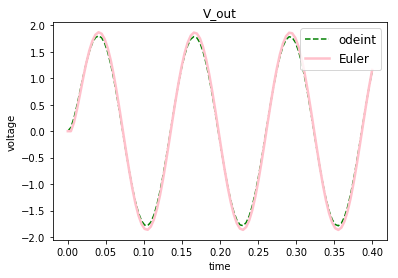

In [4]:
import numpy as np
from numpy import sin
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from pylab import plot,xlabel,ylabel,title,legend

A = 2.0
omega = 50
tmax = 0.4
pts = 100
v0 = 0.0

t = np.linspace(0,tmax,pts)

h = tmax/(pts-1)

def vi(y,t):
    return ((A * sin(omega*t)) - y) * 100

y = odeint(vi,v0,t)

a = np.zeros(pts)
a[0] = 0
for i in range(pts-1):
    a[i+1] = a[i]+h*vi(a[i],t[i])

plot(t,y,'g--',label='odeint')
plot(t,a,'pink',label='Euler',linewidth=2.5)
xlabel('time')
ylabel('voltage')
title('V_out')
legend(fontsize=12)